<a href="https://colab.research.google.com/github/Dhalapathi-DS/Delhivery-Feature-Engineering/blob/main/Delhivery_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Delhivery**

**Problem Statement:**


The objective is to analyze and compare actual travel times and distances with the estimated OSRM (Open Source Routing Machine) times and distances for logistics operations. The goal is to evaluate the accuracy of OSRM predictions, identify inefficiencies, and provide actionable insights for optimizing route planning and delivery schedules. This analysis will help improve operational efficiency, reduce costs, and enhance customer satisfaction.

**Import Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from sklearn.preprocessing import MinMaxScaler, StandardScaler


**Load the Data**

In [ ]:
data=pd.read_csv('delhivery_data.csv')
data

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


# **Exploratory Data Analysis**

**Basic Data Cleaning and Exploration**

In [ ]:
print("Shape of Data:", data.shape)
print("\nData Types and Missing Values:")
print(data.info())
categorical_columns = data.select_dtypes(include='object').columns
for col in categorical_columns:
    data[col] = data[col].astype('category')
print("\nMissing Values in Each Column:")
print(data.isnull().sum())
print("\nStatistical Summary:")
print(data.describe())


Shape of Data: (144867, 24)

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_

**Insights**

The dataset contains 144,867 entries with 36 columns, including a mix of object, datetime, boolean, integer, and float data types. No missing values are present in any column. Key features include trip-related information such as creation time, route details, source and destination, as well as various time and distance metrics like actual and OSRM times, distances, and factors. The trips occurred in September and October 2018. Statistical summaries indicate significant variation in travel times and distances, with some negative segment times suggesting potential data issues.

**Check for Missing Values**

In [ ]:
data.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


**Handle Missing Values**

In [ ]:
data[['source_name', 'destination_name']] = data[['source_name', 'destination_name']].astype(str).fillna('unknown')


**Verify Missing Values Are Handled**

In [ ]:
data.isnull().sum()


,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


**Insights**

While checking for null values, I found that source_name has 293 missing values, and destination_name has 261 missing values. Since imputation isn't feasible for these columns, I decided to fill the null values with 'unknown.' After this, no other null values were found in the dataset.

**Convert Time Columns to Datetime**

In [ ]:
data[['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']]

,trip_creation_time,od_start_time,od_end_time,cutoff_timestamp
0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:27:55
1,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:17:55
2,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:01:19.505586
3,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:39:57
4,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 03:33:55
...,...,...,...,...
144862,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:57:20
144863,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:31:18
144864,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 21:11:18
144865,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,2018-09-20 20:53:19


**Handling Inconsistent Timestamps in cutoff_timestamp Column
Issue:**
The cutoff_timestamp column has inconsistent datetime formats—some values include microseconds (e.g., 2018-09-20 04:01:19.505586), while others do not (e.g., 2018-09-20 04:27:55).

Why Does This Cause an Error?
When using pd.to_datetime() to parse the column, pandas expects all values to follow a consistent format. The presence of both microsecond and non-microsecond timestamps leads to confusion, resulting in a ValueError.

Solution:
To resolve this issue, ensure a uniform datetime format before conversion:

.str.split('.').str[0] → Retains only the YYYY-MM-DD HH:MM:SS portion, discarding microseconds.
.astype(str) → Standardizes the data type as string, preventing mixed-type issues.
errors='coerce' → Converts any invalid formats to NaT, allowing for separate handling and correction if needed.
This approach maintains data integrity and avoids blindly ignoring errors, ensuring a reliable datetime conversion process.

In [ ]:
time_cols = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']

# Remove microseconds correctly by splitting at '.' and keeping only the first part
data[time_cols] = data[time_cols].astype(str).apply(lambda col: col.str.split('.').str[0])

# Convert to datetime with strict format enforcement
data[time_cols] = data[time_cols].apply(pd.to_datetime, format="%Y-%m-%d %H:%M:%S", errors='coerce')


In [ ]:
print("\nChecking for microseconds:", data[time_cols].apply(lambda x: x.astype(str).str.contains(r"\.\d+")).sum().sum())  # Should be 0
print("\nChecking for invalid timestamps (NaT values):\n", data[time_cols].isna().sum())  # Should be 0
print("\nColumn data types:\n", data[time_cols].dtypes)  # Should be datetime64[ns]



Checking for microseconds: 0

Checking for invalid timestamps (NaT values):
 trip_creation_time    0
od_start_time         0
od_end_time           0
cutoff_timestamp      0
dtype: int64

Column data types:
 trip_creation_time    datetime64[ns]
od_start_time         datetime64[ns]
od_end_time           datetime64[ns]
cutoff_timestamp      datetime64[ns]
dtype: object


checking the steps:

Microseconds (should be 0)

Invalid timestamps (NaT) (should be 0)

Data types (should be datetime64[ns])

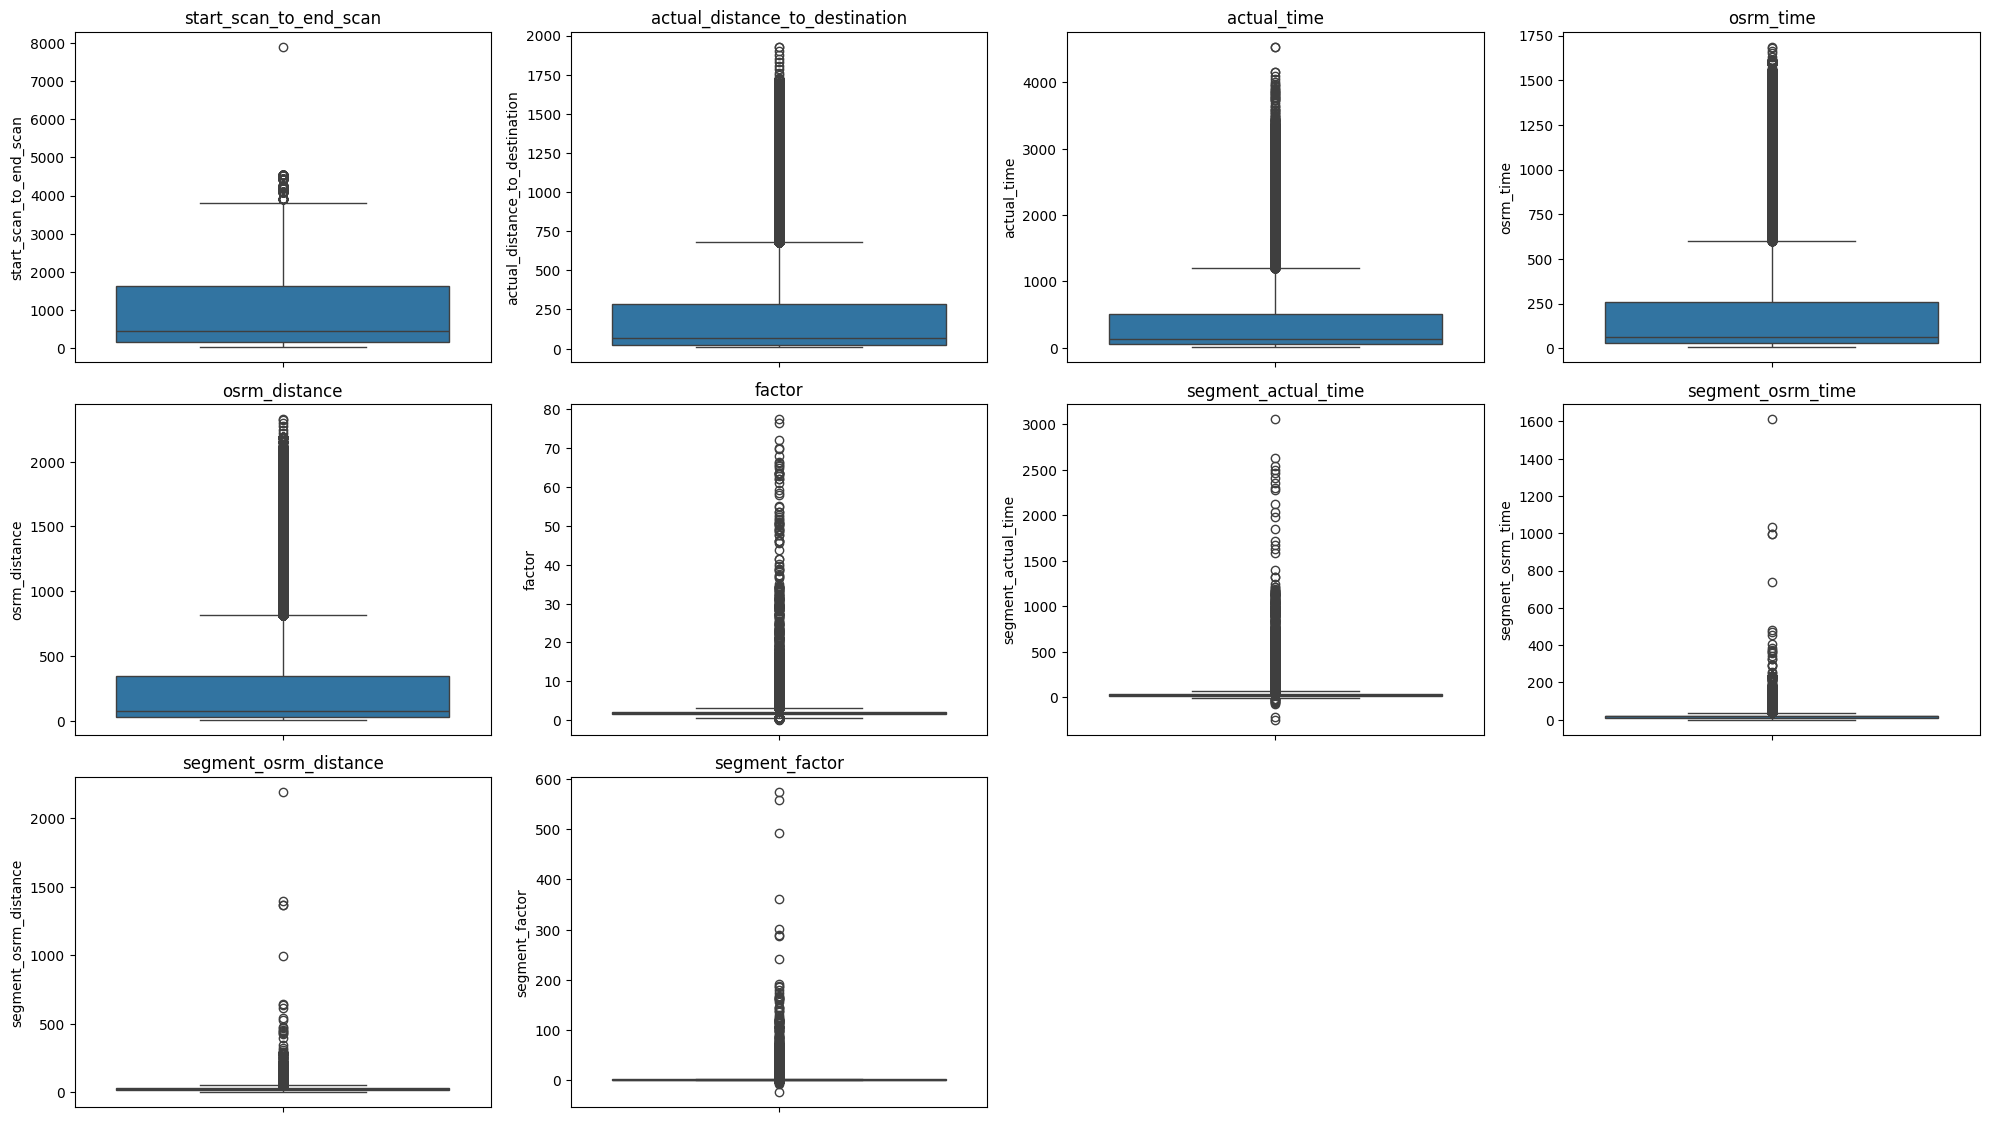

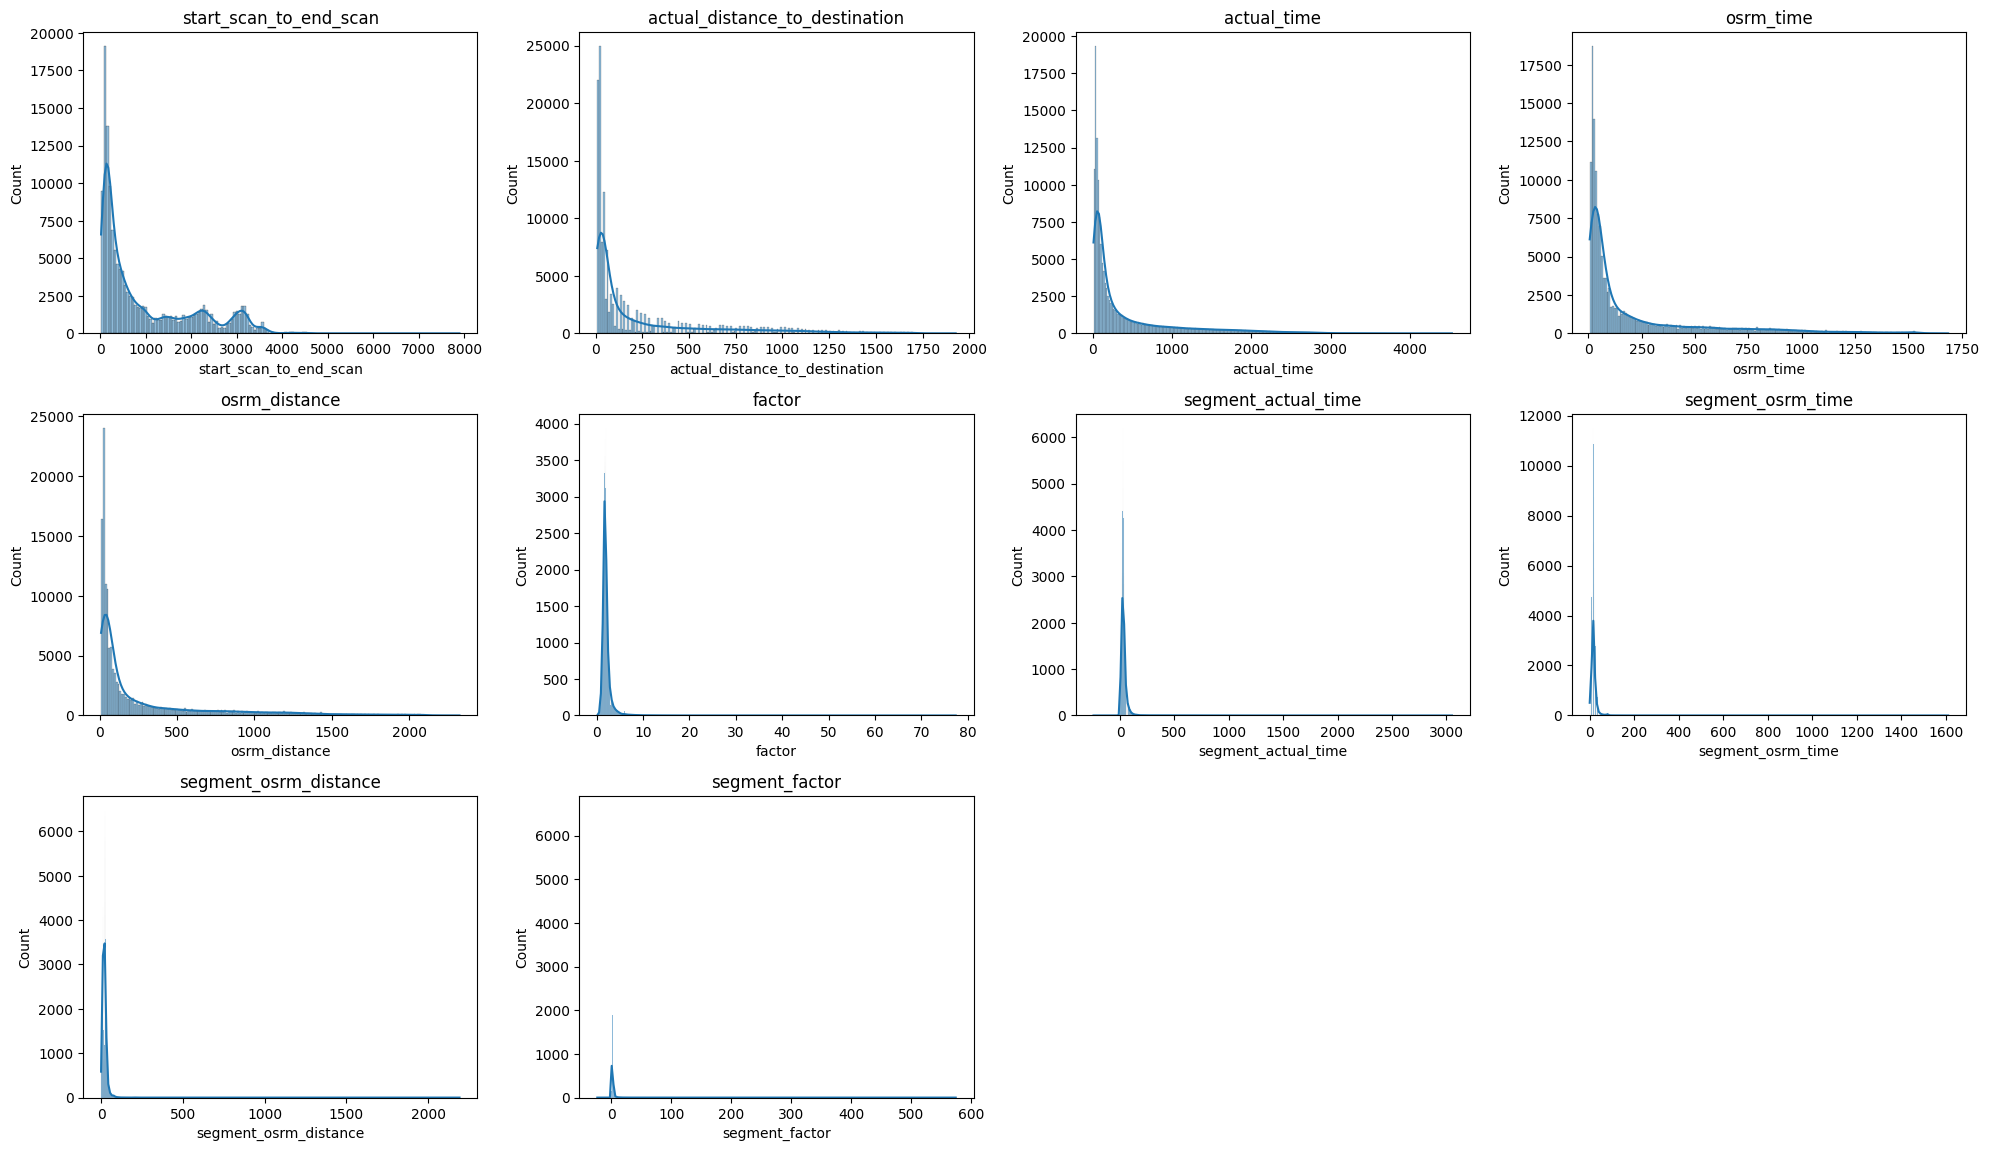

In [ ]:
continuous_cols = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time',
                   'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
                   'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',]

# Boxplots for Outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(continuous_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Distribution Plots for Visual Analysis
plt.figure(figsize=(20, 15))
for i, col in enumerate(continuous_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


# **Comparison & Visualization of Time and Distance Fields:**

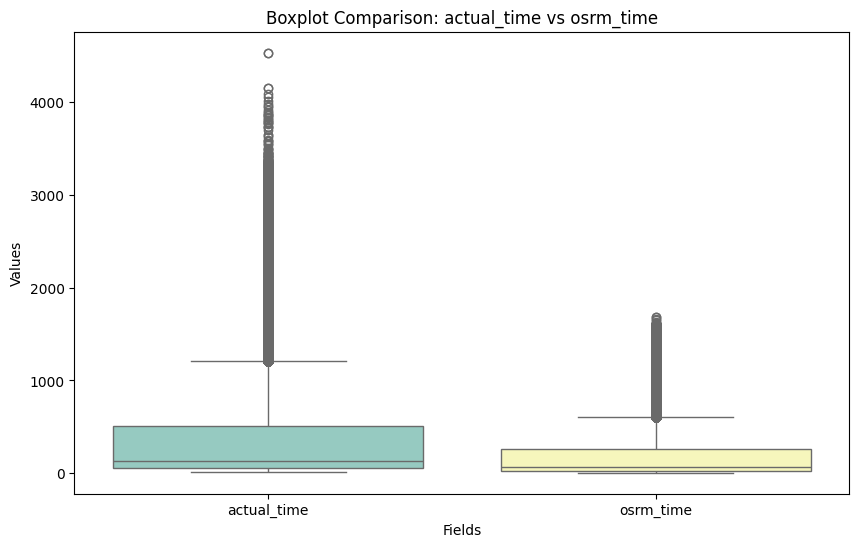

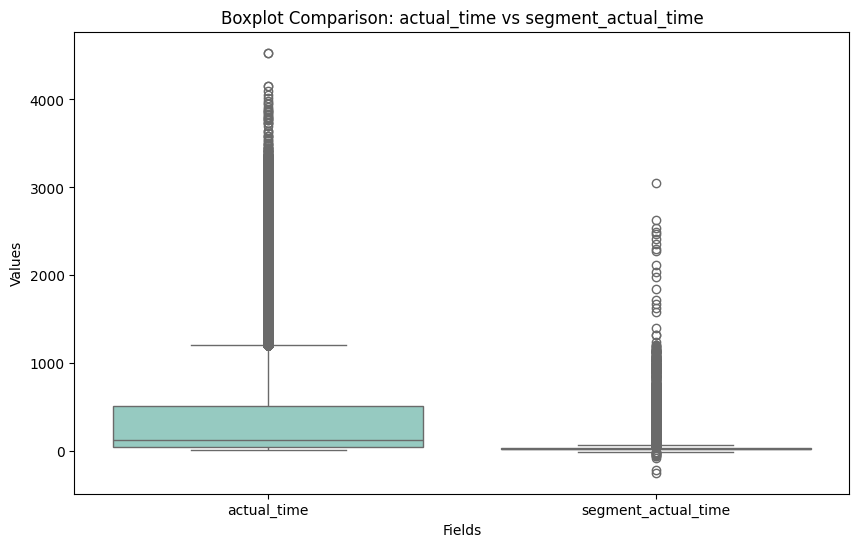

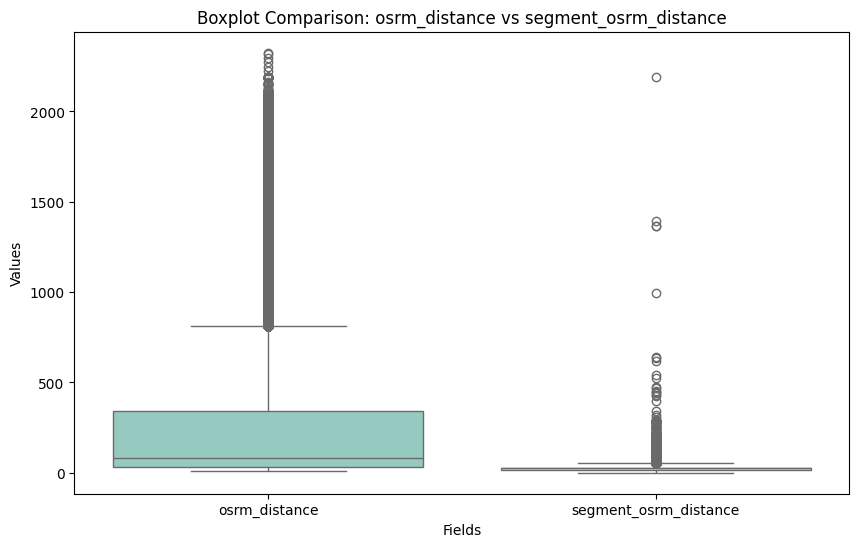

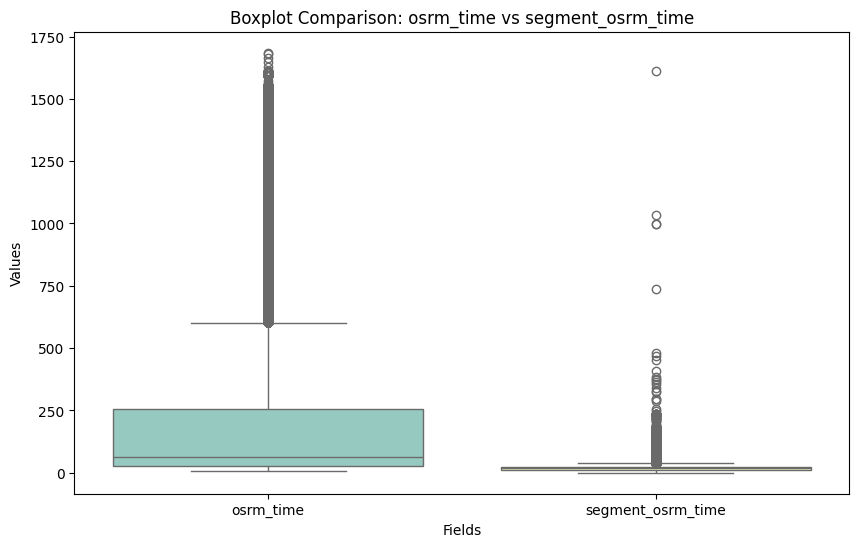

In [ ]:
# Pairs of fields to compare
time_fields = [
    ('actual_time', 'osrm_time'),
    ('actual_time', 'segment_actual_time'),
    ('osrm_distance', 'segment_osrm_distance'),
    ('osrm_time', 'segment_osrm_time')
]

# Boxplots for comparison
for pair in time_fields:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data[[pair[0], pair[1]]], palette='Set3')
    plt.title(f'Boxplot Comparison: {pair[0]} vs {pair[1]}')
    plt.xlabel('Fields')
    plt.ylabel('Values')
    plt.show()


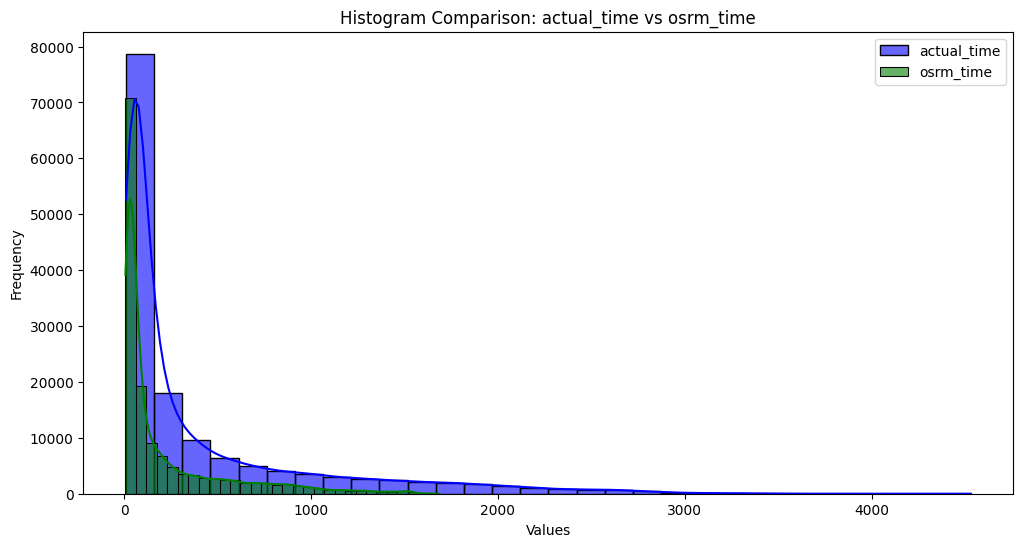

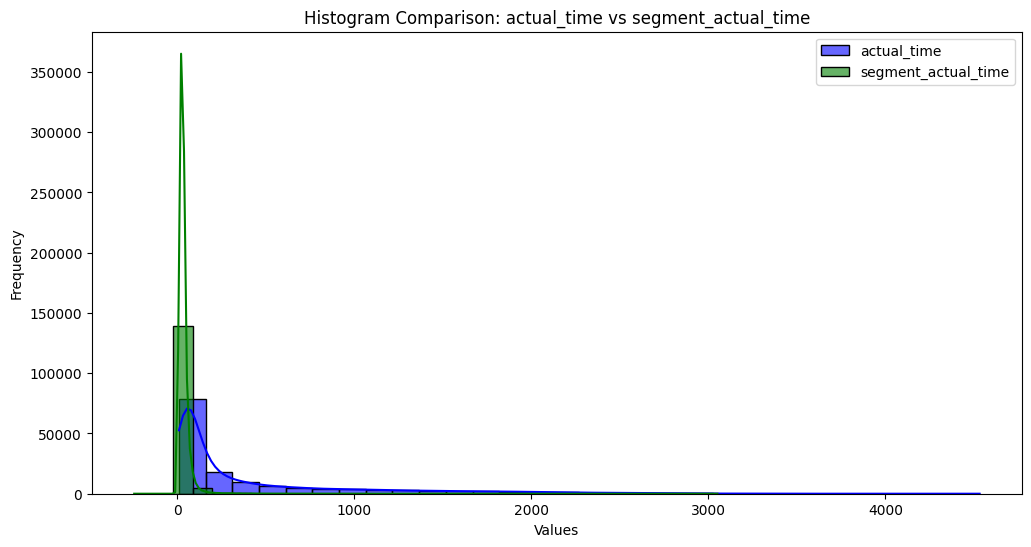

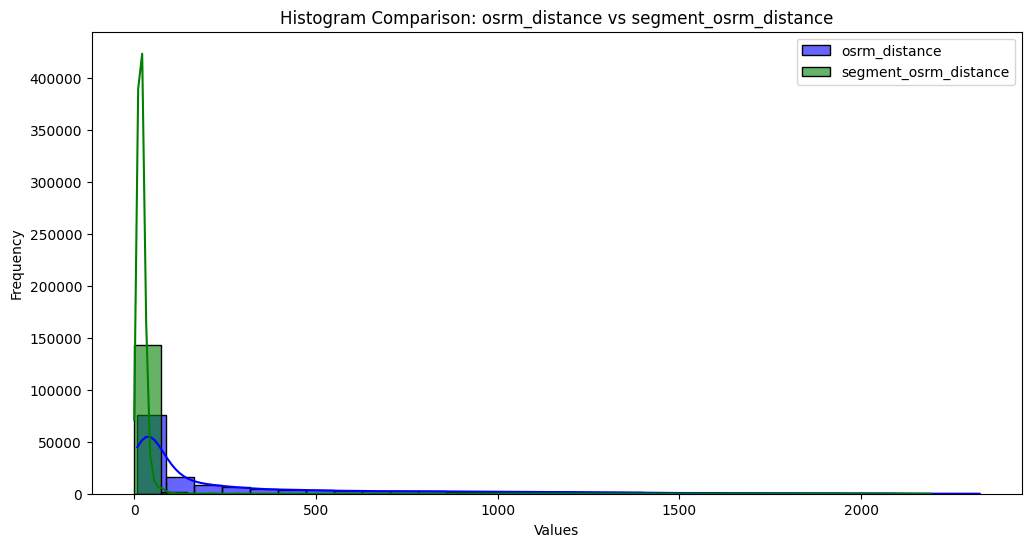

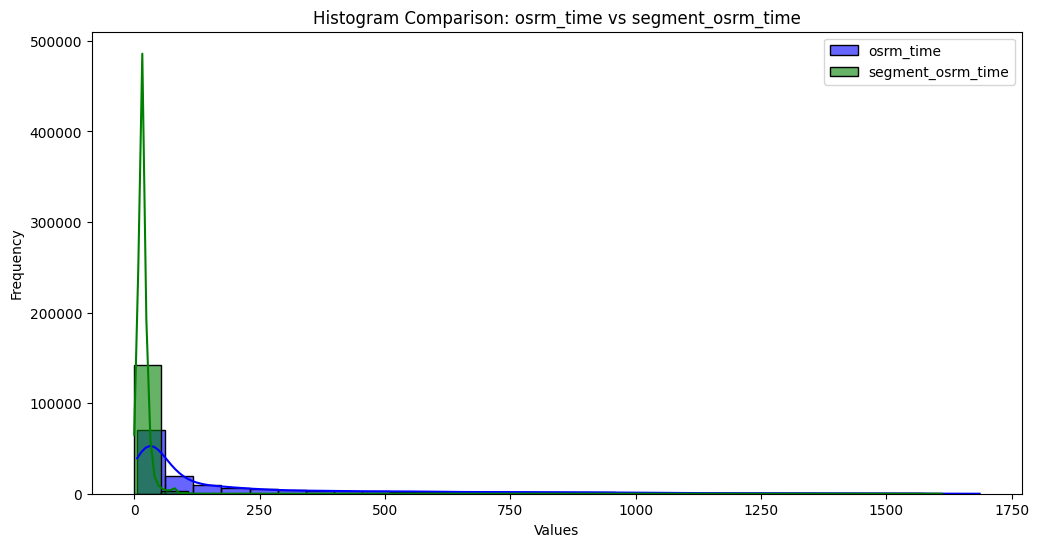

In [ ]:
# Histograms for distribution comparison
for pair in time_fields:
    plt.figure(figsize=(12, 6))

    sns.histplot(data[pair[0]], bins=30, color='blue', kde=True, label=pair[0], alpha=0.6)
    sns.histplot(data[pair[1]], bins=30, color='green', kde=True, label=pair[1], alpha=0.6)

    plt.title(f'Histogram Comparison: {pair[0]} vs {pair[1]}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


**Insights**

The overlaid histograms of actual_time and osrm_time clearly show that the distribution of osrm_time is significantly skewed towards much lower values than actual_time.  This indicates that the OSRM (Open Source Routing Machine) consistently underestimates the actual delivery times. The sharp peak in osrm_time at the lower end suggests a systematic bias, where OSRM's calculated shortest path times are far shorter than the real-world times captured by actual_time. The wider spread and rightward tail of actual_time suggest that real-world deliveries encounter various delays and complexities not accounted for by the OSRM calculation.  This discrepancy highlights the need for a correction factor or a more comprehensive model to accurately predict delivery times, especially if relying on OSRM for initial estimations.

The overlaid histograms compare total trip time (actual_time) with segment time (segment_actual_time).  Segment times are significantly shorter, clustering at lower values compared to the broader distribution of total trip times.  This difference in scale is expected, as segments represent portions of a complete trip.  While both distributions appear skewed, the total trip time spans a much wider range, indicating that trips consist of multiple segments or include some longer segments.  The distribution of segment times contributes to the overall pattern of total trip durations.

The histogram comparison highlights the relationship between segment distances and total trip distances as calculated by the OSRM (Open Source Routing Machine).  The fact that segment_osrm_distance is concentrated at much lower values confirms that segments are portions of the overall trip.  The skew in both distributions likely reflects the underlying road network and the varying lengths of trips and their constituent segments.  It also suggests that OSRM might be more accurate in estimating shorter distances (segments) compared to longer distances (total trips), as there are likely fewer compounding errors over shorter calculations.  However, this would require further investigation.  Essentially, this visualization reinforces the understanding that total trip distance is the sum of segment distances, and the distribution of segment distances plays a role in shaping the overall trip distance distribution.

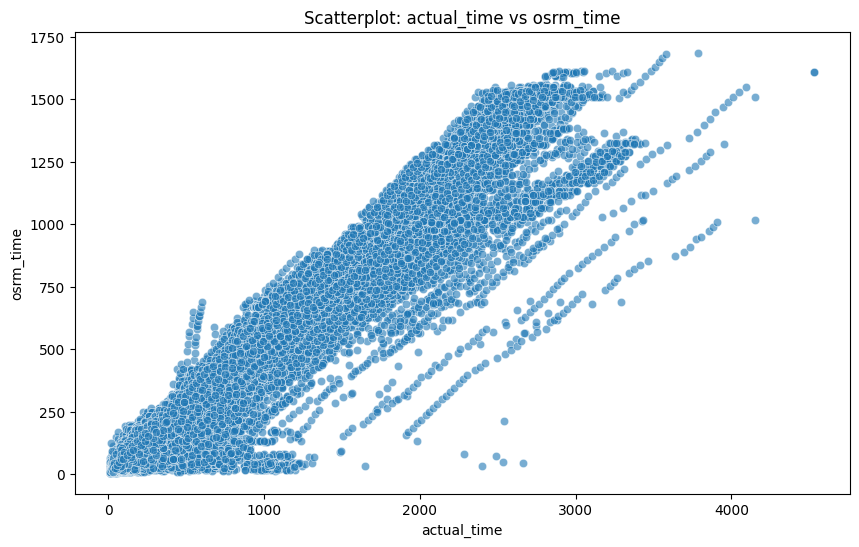

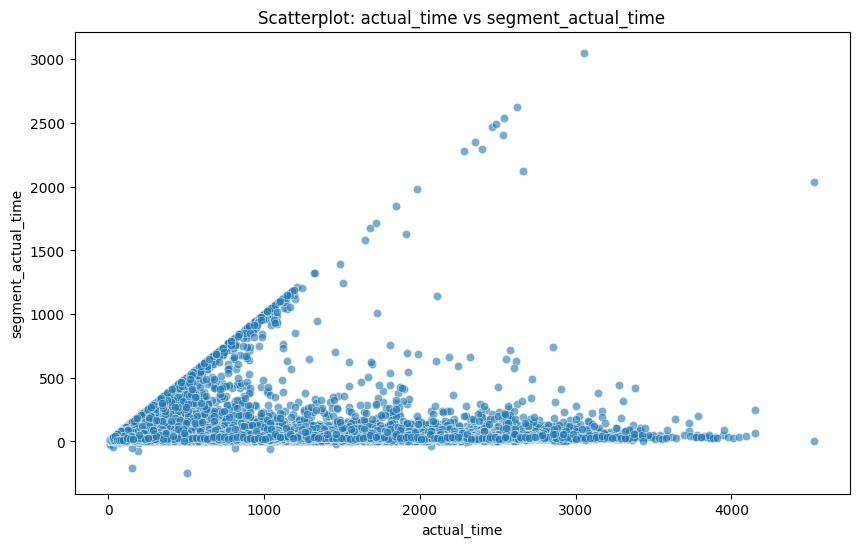

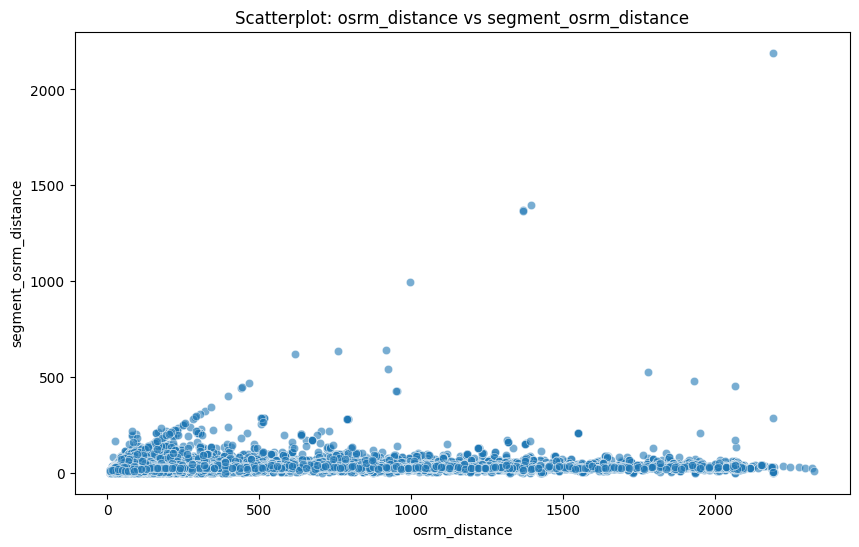

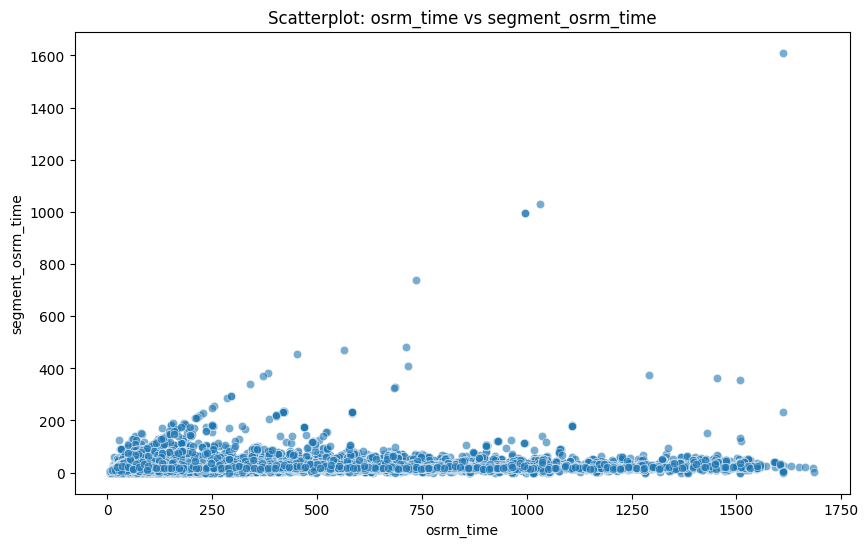

In [ ]:
# Scatterplots to analyze relationships
for pair in time_fields:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[pair[0]], y=data[pair[1]], alpha=0.6)
    plt.title(f'Scatterplot: {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()


# **Merging and Aggregating at Segment Level**

In [ ]:
# Step 1: Create a unique identifier for different segments
data['segment_key'] = data['trip_uuid'].astype(str) + "_" + data['source_center'].astype(str) + "_" + data['destination_center'].astype(str)
# Step 2: Compute cumulative sums for segment-related fields
data['segment_actual_time_sum'] = data.groupby('segment_key')['segment_actual_time'].cumsum()
data['segment_osrm_distance_sum'] = data.groupby('segment_key')['segment_osrm_distance'].cumsum()
data['segment_osrm_time_sum'] = data.groupby('segment_key')['segment_osrm_time'].cumsum()
# Step 3: Define aggregation rules for segment-level aggregation
create_segment_dict = {
    'trip_uuid': 'first',
    'source_center': 'first',
    'destination_center': 'first',
    'segment_actual_time_sum': 'max',
    'segment_osrm_distance_sum': 'max',
    'segment_osrm_time_sum': 'max',
    'od_end_time': 'last'
}
# Step 4: Group data at segment level and apply aggregations
segment_data = data.groupby('segment_key').agg(create_segment_dict).reset_index()
# Step 5: Sort the final DataFrame
segment_data = segment_data.sort_values(by=['segment_key', 'od_end_time'], ascending=[True, True])
segment_data.head()


,segment_key,trip_uuid,source_center,destination_center,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_end_time
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,IND209304AAA,IND000000ACB,728.0,670.6205,534.0,2018-09-13 13:40:23
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,IND462022AAA,IND209304AAA,820.0,649.8528,474.0,2018-09-12 16:39:46
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,IND561203AAB,IND562101AAA,46.0,28.1995,26.0,2018-09-12 03:01:59
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,IND572101AAA,IND561203AAB,95.0,55.9899,39.0,2018-09-12 02:03:09
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,IND000000ACB,IND160002AAC,608.0,317.7408,231.0,2018-09-14 17:34:55


# **Feature Engineering**

**Calculate time taken between od_start_time and od_end_time and keep it as a feature named od_time_diff_hour. Drop the original columns, if required.**

In [ ]:
# Step 1: Calculate time difference in hours
data['od_start_time'] = pd.to_datetime(data['od_start_time'])
data['od_end_time'] = pd.to_datetime(data['od_end_time'])
data['od_time_diff_hour'] = (data['od_end_time'] - data['od_start_time']).dt.total_seconds() / 3600

# Drop original columns if needed
data.drop(columns=['od_start_time', 'od_end_time'], inplace=True)

**Destination Name: Split and extract features out of destination. City-place-code
(State)**

In [ ]:
import pandas as pd

# Function to process destination_name
def process_destination(name):
    # Extract destination_code(state)
    code_state = name[name.find("("):].strip()  # Extracting the part in parentheses
    name = name[:name.find("(")].strip()  # Removing the extracted part

    # Splitting remaining part in reverse order
    parts = name.rsplit("_", 2)  # Split from the end with max 2 splits

    # Assign extracted values
    if len(parts) == 3:
        city, place, code = parts
    elif len(parts) == 2:
        city, code = parts
        place = city  # If place is missing, set it same as city
    else:
        city = place = parts[0]
        code = ""

    return pd.Series([city, place, f"{code} {code_state}".strip()])

# Applying the function to the column
data[['destination_city', 'destination_place', 'destination_code(state)']] = data['destination_name'].apply(process_destination)

# Drop the original column if required
# data.drop(columns=['destination_name'], inplace=True)


**Source Name: Split and extract features out of destination. City-place-code
(State)**

In [ ]:
# Function to process source_name
def process_source(name):
    # Extract source_code(state)
    code_state = name[name.find("("):].strip()  # Extracting the part in parentheses
    name = name[:name.find("(")].strip()  # Removing the extracted part

    # Splitting remaining part in reverse order
    parts = name.rsplit("_", 2)  # Split from the end with max 2 splits

    # Assign extracted values
    if len(parts) == 3:
        city, place, code = parts
    elif len(parts) == 2:
        city, code = parts
        place = city  # If place is missing, set it same as city
    else:
        city = place = parts[0]
        code = ""

    return pd.Series([city, place, f"{code} {code_state}".strip()])

# Applying the function to the column
data[['source_city', 'source_place', 'source_code(state)']] = data['source_name'].apply(process_source)

# Drop the original column if required
# data.drop(columns=['source_name'], inplace=True)


In [ ]:
# Ensure trip_creation_time is in datetime format
data['trip_creation_time'] = pd.to_datetime(data['trip_creation_time'])

# Extract year, month, and day
data['trip_year'] = data['trip_creation_time'].dt.year
data['trip_month'] = data['trip_creation_time'].dt.month
data['trip_day'] = data['trip_creation_time'].dt.day

# Drop the original column if required
# data.drop(columns=['trip_creation_time'], inplace=True)


# **Checking relationship between aggregated fields**

In [ ]:
import pandas as pd

# Define aggregation functions for trip-level grouping
agg_dict = {
    'trip_creation_time': 'first',  # Keep the first timestamp for each trip
    'route_schedule_uuid': 'first',  # Keep the first occurrence
    'route_type': 'first',  # Assuming route type is the same for a trip
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'first',
    'destination_name': 'first',
    'start_scan_to_end_scan': 'sum',  # Summing scan duration for the entire trip
    'od_time_diff_hour': 'sum',  # Summing time difference in hours
    'destination_city': 'first',
    'destination_place': 'first',
    'destination_code(state)': 'first',
    'source_city': 'first',
    'source_place': 'first',
    'source_code(state)': 'first',
    'trip_year': 'first',
    'trip_month': 'first',
    'trip_day': 'first'
}

# Group by 'trip_uuid' and apply the aggregation
trip_data = data.groupby('trip_uuid').agg(agg_dict).reset_index()

# Display the processed DataFrame
trip_data.head()


<ipython-input-19-2eb68316a8ad>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trip_data = data.groupby('trip_uuid').agg(agg_dict).reset_index()


,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,destination_city,destination_place,destination_code(state),source_city,source_place,source_code(state),trip_year,trip_month,trip_day
0,trip-153671041653548748,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),43659.0,728.010000,Kanpur_Central,H,6 (Uttar Pradesh),Bhopal,Trnsport,H (Madhya Pradesh),2018,9,12
1,trip-153671042288605164,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),906.0,15.220000,Doddablpur,ChikaDPP,D (Karnataka),Tumkur,Veersagr,I (Karnataka),2018,9,12
2,trip-153671043369099517,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),248631.0,4144.917778,Gurgaon,Bilaspur,HB (Haryana),Bangalore,Nelmngla,H (Karnataka),2018,9,12
3,trip-153671046011330457,2018-09-12 00:01:00,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),200.0,3.349444,Mumbai,MiraRd,IP (Maharashtra),Mumbai Hub,Mumbai Hub,(Maharashtra),2018,9,12
4,trip-153671052974046625,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),1586.0,26.478611,Hospet,Hospet,(Karnataka),Bellary,Bellary,Dc (Karnataka),2018,9,12


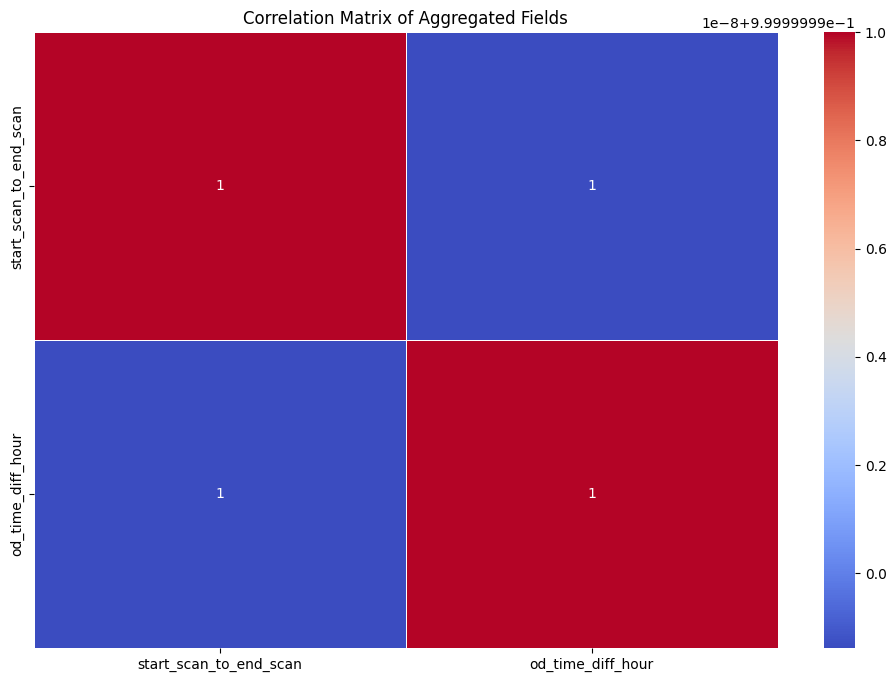

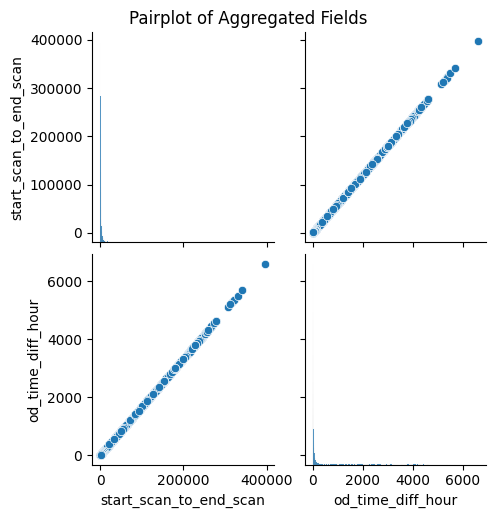

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Identify numerical columns for correlation analysis
num_cols = trip_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Calculate correlation matrix
corr_matrix = trip_data[num_cols].corr()

# Step 3: Visualize correlation with Heatmap and Pairplot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Aggregated Fields')
plt.show()

sns.pairplot(trip_data[num_cols])
plt.suptitle('Pairplot of Aggregated Fields', y=1.02)
plt.show()


# **Outlier treatment**

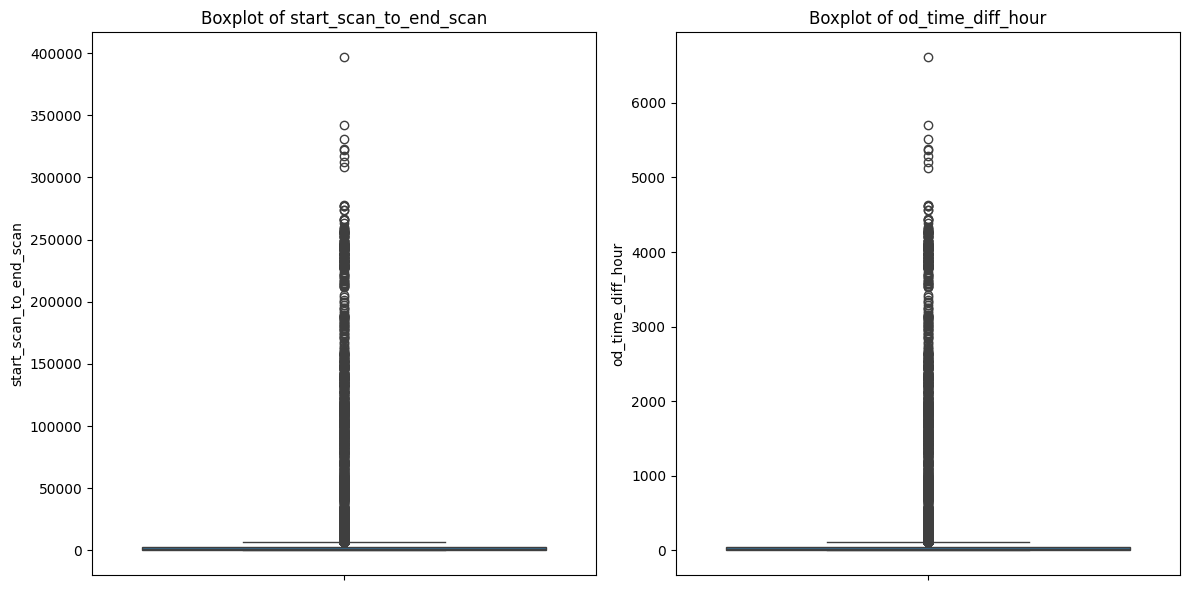

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,destination_city,destination_place,destination_code(state),source_city,source_place,source_code(state),trip_year,trip_month,trip_day
1,trip-153671042288605164,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),906.0,15.220000,Doddablpur,ChikaDPP,D (Karnataka),Tumkur,Veersagr,I (Karnataka),2018,9,12
3,trip-153671046011330457,2018-09-12 00:01:00,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),200.0,3.349444,Mumbai,MiraRd,IP (Maharashtra),Mumbai Hub,Mumbai Hub,(Maharashtra),2018,9,12
4,trip-153671052974046625,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),1586.0,26.478611,Hospet,Hospet,(Karnataka),Bellary,Bellary,Dc (Karnataka),2018,9,12
5,trip-153671055416136166,2018-09-12 00:02:34,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),249.0,4.189444,Chennai,Chennai,Poonamallee (Tamil Nadu),Chennai,Porur,DPC (Tamil Nadu),2018,9,12
6,trip-153671066201138152,2018-09-12 00:04:22,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),98.0,1.633333,Chennai,Vandalur,Dc (Tamil Nadu),Chennai,Chrompet,DPC (Tamil Nadu),2018,9,12


In [ ]:
num_cols = ['start_scan_to_end_scan', 'od_time_diff_hour']  # Add more numerical columns if needed
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=trip_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

for col in num_cols:
    Q1 = trip_data[col].quantile(0.25)
    Q3 = trip_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    trip_data = trip_data[(trip_data[col] >= lower_bound) & (trip_data[col] <= upper_bound)]


trip_data.head()


# **Handling categorical values**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_cols = trip_data.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(trip_data[cat_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))
trip_data = trip_data.drop(columns=cat_cols).reset_index(drop=True)
trip_data = pd.concat([trip_data, encoded_df], axis=1)
trip_data.head()


,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,destination_center,start_scan_to_end_scan,od_time_diff_hour,trip_year,trip_month,...,source_code(state)_Poonamallee (Tamil Nadu),source_code(state)_Potheri (Tamil Nadu),source_code(state)_RP (Haryana),source_code(state)_RP (Maharashtra),source_code(state)_Rakhial (Gujarat),source_code(state)_Shahdara (Delhi),source_code(state)_Sixmile (Assam),source_code(state)_Sodal Road (Punjab),source_code(state)_V (Haryana),source_code(state)_n
0,trip-153671042288605164,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,IND561203AAB,906.0,15.220000,2018,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,trip-153671046011330457,2018-09-12 00:01:00,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,IND401104AAA,200.0,3.349444,2018,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,trip-153671052974046625,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,IND583201AAA,1586.0,26.478611,2018,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,trip-153671055416136166,2018-09-12 00:02:34,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600116AAB,IND600056AAA,249.0,4.189444,2018,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,trip-153671066201138152,2018-09-12 00:04:22,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,IND600044AAD,IND600048AAA,98.0,1.633333,2018,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Column Normalization /Column Standardization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
num_cols = trip_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = MinMaxScaler()
trip_data[num_cols] = scaler.fit_transform(trip_data[num_cols])
trip_data.head()


,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,destination_center,start_scan_to_end_scan,od_time_diff_hour,trip_year,trip_month,...,source_code(state)_Poonamallee (Tamil Nadu),source_code(state)_Potheri (Tamil Nadu),source_code(state)_RP (Haryana),source_code(state)_RP (Maharashtra),source_code(state)_Rakhial (Gujarat),source_code(state)_Shahdara (Delhi),source_code(state)_Sixmile (Assam),source_code(state)_Sodal Road (Punjab),source_code(state)_V (Haryana),source_code(state)_n
0,trip-153671042288605164,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,IND561203AAB,0.244580,0.246294,2018,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,trip-153671046011330457,2018-09-12 00:01:00,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,IND401104AAA,0.048360,0.048461,2018,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,trip-153671052974046625,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,IND583201AAA,0.433574,0.433929,2018,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,trip-153671055416136166,2018-09-12 00:02:34,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600116AAB,IND600056AAA,0.061979,0.062460,2018,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,trip-153671066201138152,2018-09-12 00:04:22,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,IND600044AAD,IND600048AAA,0.020011,0.019860,2018,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Aggregate data by trip_uuid
agg_data = data.groupby('trip_uuid').agg({
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum'
}).reset_index()

# Aggregate segment_data by trip_uuid
segment_agg = segment_data.groupby('trip_uuid').agg({
    'segment_actual_time_sum': 'sum',
    'segment_osrm_distance_sum': 'sum',
    'segment_osrm_time_sum': 'sum'
}).reset_index()

# Display the aggregated data
print("Aggregated Data:")
print(agg_data.head())
print("\nAggregated Segment Data:")
print(segment_agg.head())


Aggregated Data:
                 trip_uuid  actual_time  osrm_time  osrm_distance
0  trip-153671041653548748      15682.0     7787.0     10577.7647
1  trip-153671042288605164        399.0      210.0       269.4308
2  trip-153671043369099517     112225.0    65768.0     89447.2488
3  trip-153671046011330457         82.0       24.0        31.6475
4  trip-153671052974046625        556.0      207.0       266.2914

Aggregated Segment Data:
                 trip_uuid  segment_actual_time_sum  \
0  trip-153671041653548748                   1548.0   
1  trip-153671042288605164                    141.0   
2  trip-153671043369099517                   3308.0   
3  trip-153671046011330457                     59.0   
4  trip-153671052974046625                    340.0   

   segment_osrm_distance_sum  segment_osrm_time_sum  
0                  1320.4733                 1008.0  
1                    84.1894                   65.0  
2                  2545.2678                 1941.0  
3             

<ipython-input-24-e72fdc7e11d8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_data = data.groupby('trip_uuid').agg({
<ipython-input-24-e72fdc7e11d8>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_agg = segment_data.groupby('trip_uuid').agg({


In [ ]:
# Merge the aggregated data on trip_uuid
merged_data = pd.merge(agg_data, segment_agg, on='trip_uuid', how='inner')

# Display the merged data
print("\nMerged Data:")
print(merged_data.head())



Merged Data:
                 trip_uuid  actual_time  osrm_time  osrm_distance  \
0  trip-153671041653548748      15682.0     7787.0     10577.7647   
1  trip-153671042288605164        399.0      210.0       269.4308   
2  trip-153671043369099517     112225.0    65768.0     89447.2488   
3  trip-153671046011330457         82.0       24.0        31.6475   
4  trip-153671052974046625        556.0      207.0       266.2914   

   segment_actual_time_sum  segment_osrm_distance_sum  segment_osrm_time_sum  
0                   1548.0                  1320.4733                 1008.0  
1                    141.0                    84.1894                   65.0  
2                   3308.0                  2545.2678                 1941.0  
3                     59.0                    19.8766                   16.0  
4                    340.0                   146.7919                  115.0  


# **Hypothesis Testing**

In [ ]:
from scipy import stats
def hypothesis_test_and_conclude(col1, col2, label1, label2):
    t_stat, p_val = stats.ttest_rel(merged_data[col1], merged_data[col2])
    print(f"\n{label1} vs. {label2}: t-statistic = {t_stat}, p-value = {p_val}")


    if p_val < 0.05:
        print(f"Conclusion: Reject the null hypothesis. Significant difference between {label1} and {label2}.\n")
    else:
        print(f"Conclusion: Fail to reject the null hypothesis. No significant difference between {label1} and {label2}.\n")

# Actual Time vs. OSRM Time
hypothesis_test_and_conclude('actual_time', 'osrm_time', 'Actual Time', 'OSRM Time')

# Actual Time vs. Segment Actual Time
hypothesis_test_and_conclude('actual_time', 'segment_actual_time_sum', 'Actual Time', 'Segment Actual Time')

# OSRM Distance vs. Segment OSRM Distance
hypothesis_test_and_conclude('osrm_distance', 'segment_osrm_distance_sum', 'OSRM Distance', 'Segment OSRM Distance')

# OSRM Time vs. Segment OSRM Time
hypothesis_test_and_conclude('osrm_time', 'segment_osrm_time_sum', 'OSRM Time', 'Segment OSRM Time')



Actual Time vs. OSRM Time: t-statistic = 32.468089449426905, p-value = 1.8633294618952604e-223
Conclusion: Reject the null hypothesis. Significant difference between Actual Time and OSRM Time.


Actual Time vs. Segment Actual Time: t-statistic = 30.755504981639035, p-value = 2.0773962652460127e-201
Conclusion: Reject the null hypothesis. Significant difference between Actual Time and Segment Actual Time.


OSRM Distance vs. Segment OSRM Distance: t-statistic = 30.03031541377046, p-value = 2.1753879024067997e-192
Conclusion: Reject the null hypothesis. Significant difference between OSRM Distance and Segment OSRM Distance.


OSRM Time vs. Segment OSRM Time: t-statistic = 30.29743310414474, p-value = 1.0892807362104113e-195
Conclusion: Reject the null hypothesis. Significant difference between OSRM Time and Segment OSRM Time.



# **Business Insights**

<ipython-input-30-5402d4c23367>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trip Count', y='Source State', data=source_state_count.head(10), palette='viridis')


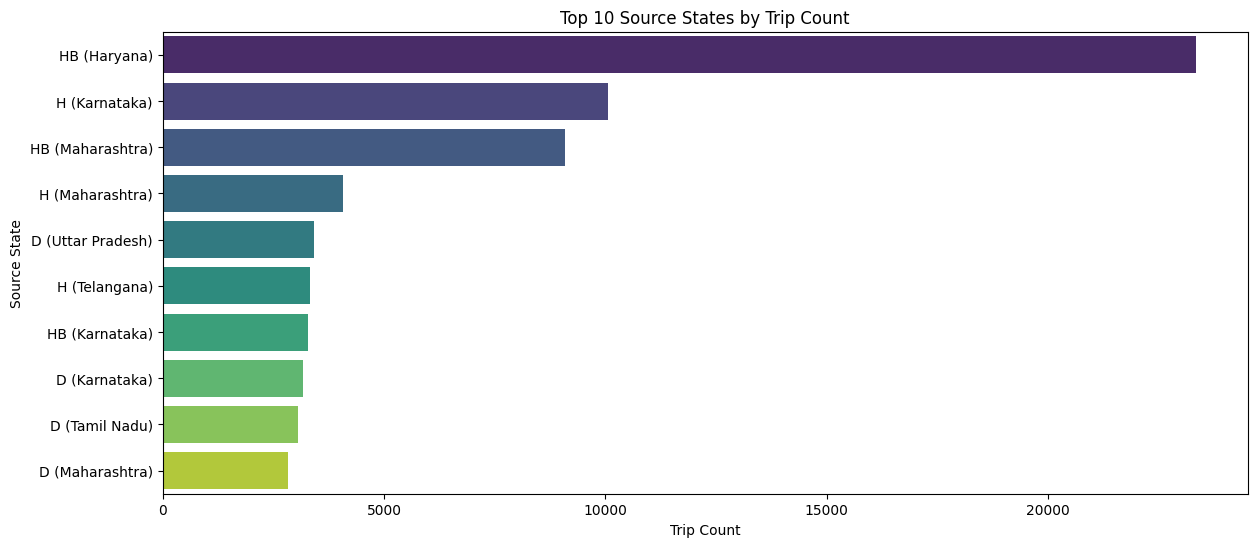

<ipython-input-30-5402d4c23367>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trip Count', y='Destination State', data=destination_state_count.head(10), palette='plasma')


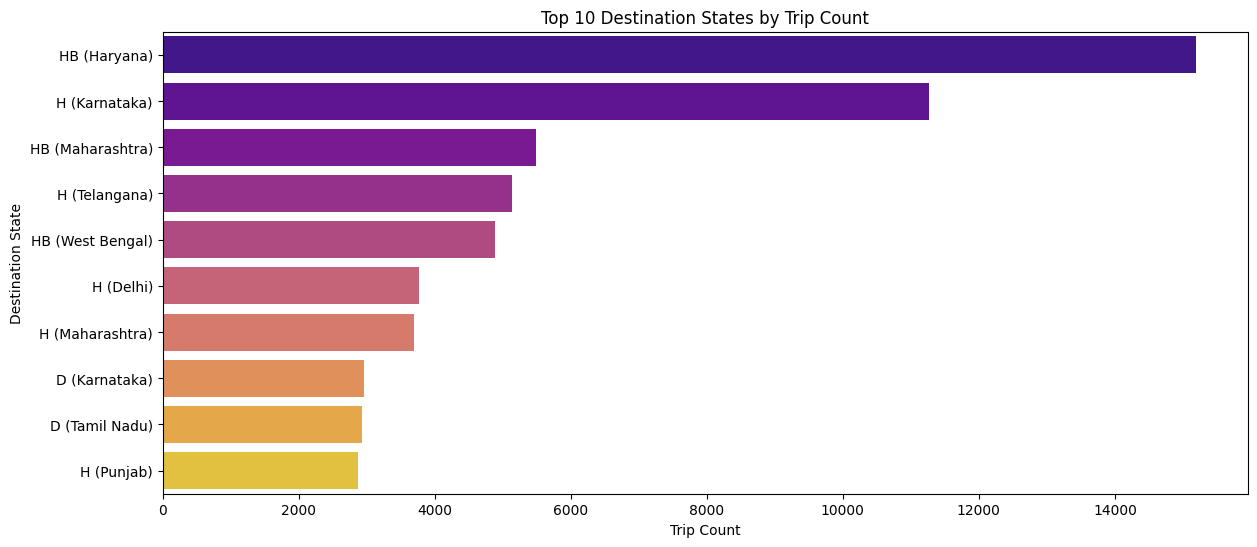

<ipython-input-30-5402d4c23367>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trip Count', y='Corridor', data=corridor_count.head(10), palette='magma')


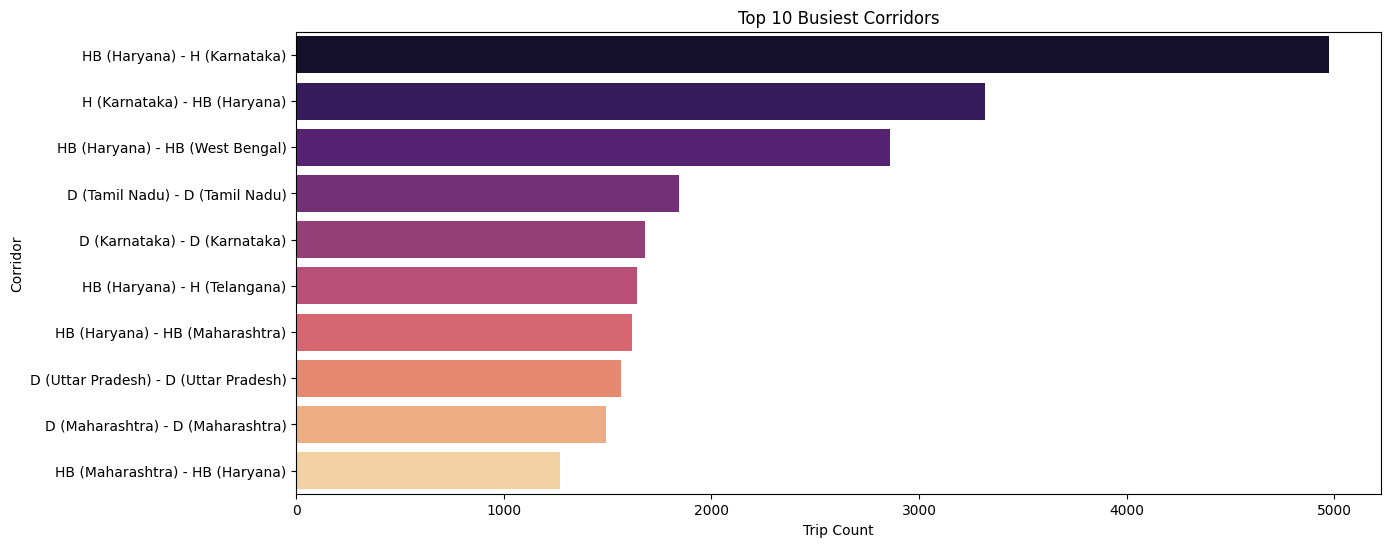

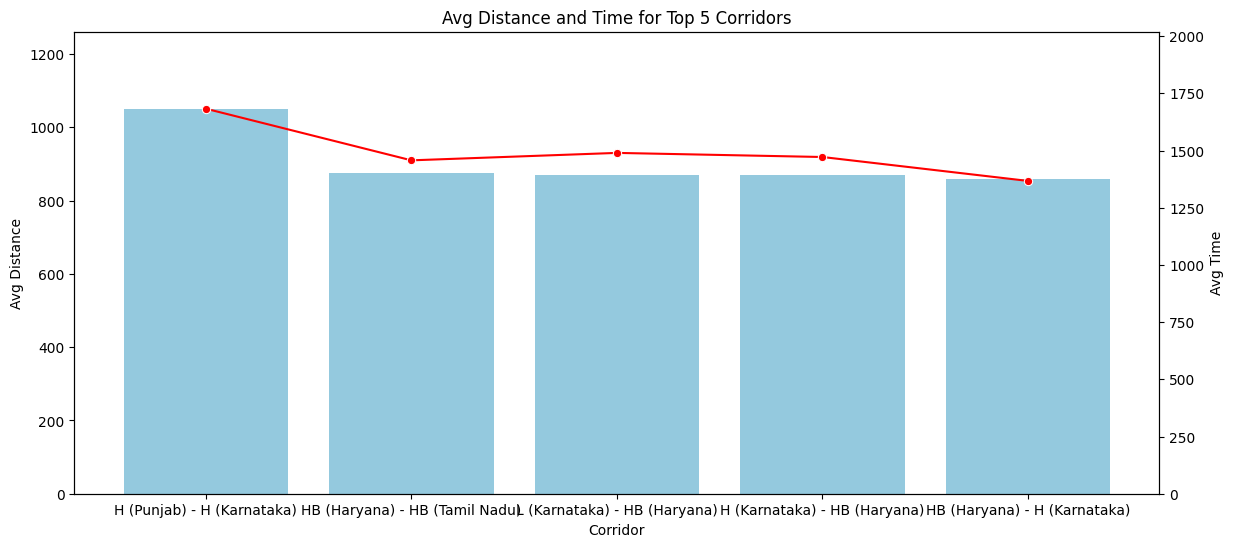

<ipython-input-30-5402d4c23367>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='trip_month', data=data, palette='cool')


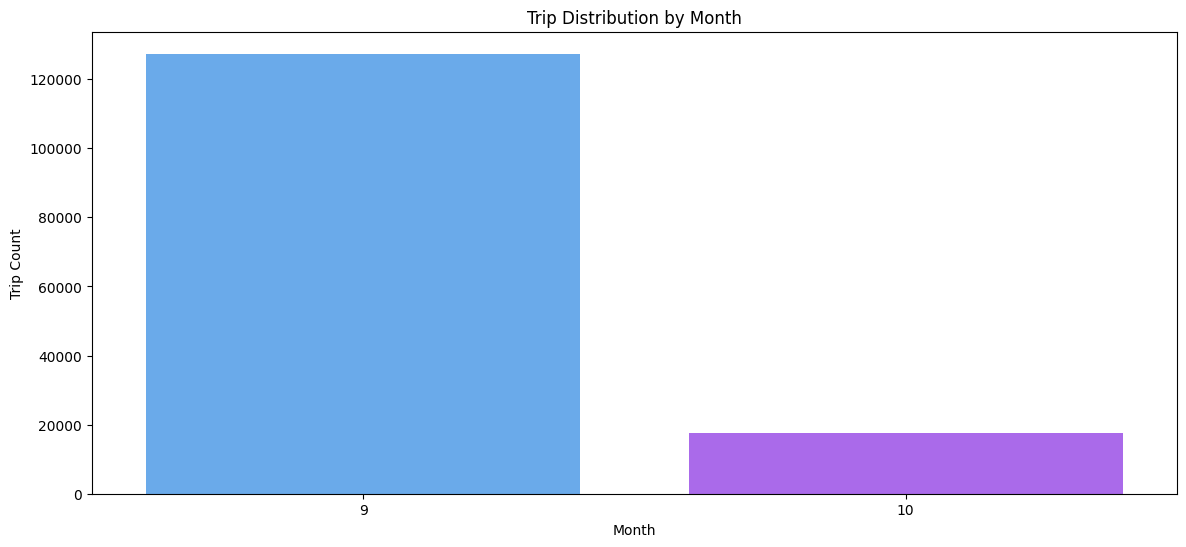

<ipython-input-30-5402d4c23367>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='trip_day', data=data, palette='spring')


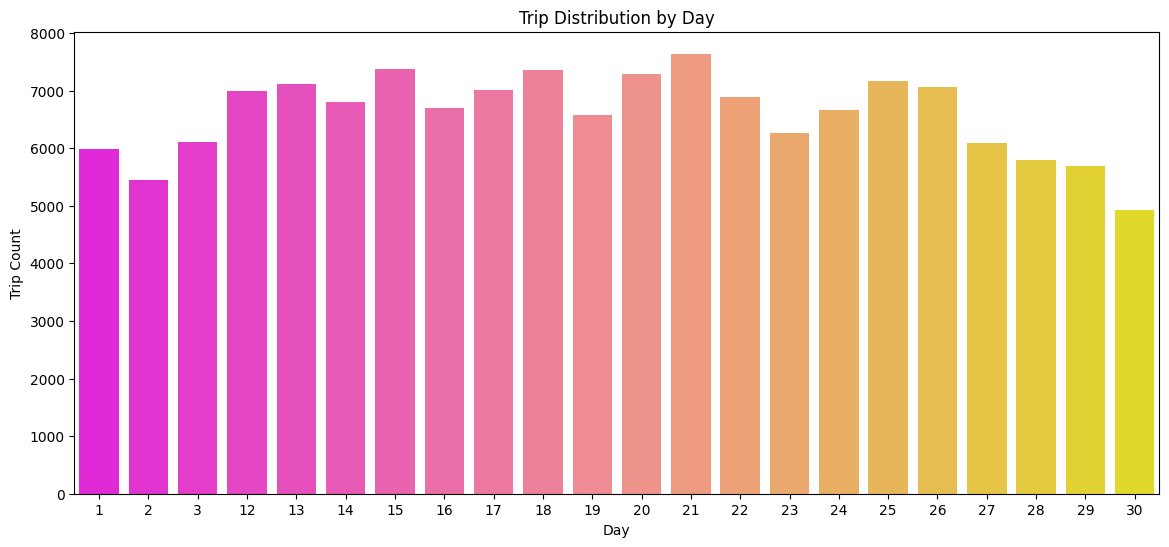

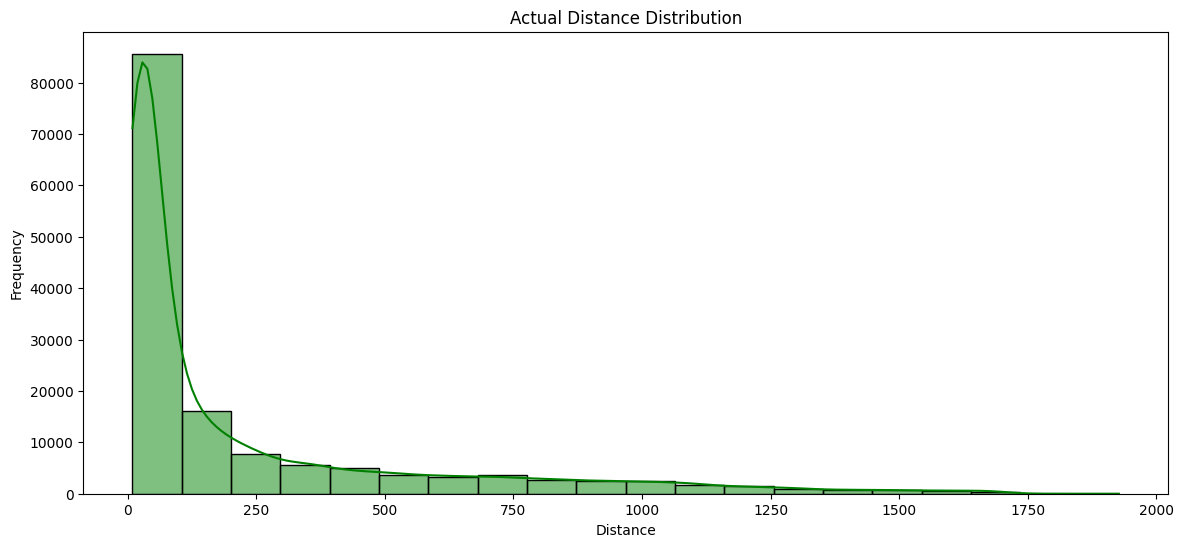

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure datetime conversion for time-based analysis
data['trip_creation_time'] = pd.to_datetime(data['trip_creation_time'])

# Create 'Corridor' column by combining source and destination states
data['Corridor'] = data['source_code(state)'] + ' - ' + data['destination_code(state)']

# 1. Top 10 Source States by Trip Count
source_state_count = data['source_code(state)'].value_counts().reset_index()
source_state_count.columns = ['Source State', 'Trip Count']
plt.figure(figsize=(14, 6))
sns.barplot(x='Trip Count', y='Source State', data=source_state_count.head(10), palette='viridis')
plt.title('Top 10 Source States by Trip Count')
plt.xlabel('Trip Count')
plt.ylabel('Source State')
plt.show()

# 2. Top 10 Destination States by Trip Count
destination_state_count = data['destination_code(state)'].value_counts().reset_index()
destination_state_count.columns = ['Destination State', 'Trip Count']
plt.figure(figsize=(14, 6))
sns.barplot(x='Trip Count', y='Destination State', data=destination_state_count.head(10), palette='plasma')
plt.title('Top 10 Destination States by Trip Count')
plt.xlabel('Trip Count')
plt.ylabel('Destination State')
plt.show()

# 3. Busiest Corridors
corridor_count = data['Corridor'].value_counts().reset_index()
corridor_count.columns = ['Corridor', 'Trip Count']
plt.figure(figsize=(14, 6))
sns.barplot(x='Trip Count', y='Corridor', data=corridor_count.head(10), palette='magma')
plt.title('Top 10 Busiest Corridors')
plt.xlabel('Trip Count')
plt.ylabel('Corridor')
plt.show()

# 4. Average Distance and Time for Top 5 Corridors
corridor_stats = data.groupby('Corridor').agg({'actual_distance_to_destination': 'mean', 'actual_time': 'mean'}).reset_index()
top_corridors = corridor_stats.sort_values(by='actual_distance_to_destination', ascending=False).head(5)

fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

sns.barplot(x='Corridor', y='actual_distance_to_destination', data=top_corridors, ax=ax1, color='skyblue')
sns.lineplot(x='Corridor', y='actual_time', data=top_corridors, ax=ax2, color='red', marker='o')

ax1.set_ylabel('Avg Distance')
ax2.set_ylabel('Avg Time')
ax1.set_ylim(0, top_corridors['actual_distance_to_destination'].max() * 1.2)
ax2.set_ylim(0, top_corridors['actual_time'].max() * 1.2)  # Adjusting y-axis limit for visibility

plt.title('Avg Distance and Time for Top 5 Corridors')
plt.show()

# 5. Trip Distribution by Month
plt.figure(figsize=(14, 6))
sns.countplot(x='trip_month', data=data, palette='cool')
plt.title('Trip Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Trip Count')
plt.show()

# 6. Trip Distribution by Day
plt.figure(figsize=(14, 6))
sns.countplot(x='trip_day', data=data, palette='spring')
plt.title('Trip Distribution by Day')
plt.xlabel('Day')
plt.ylabel('Trip Count')
plt.show()

# 7. Actual Distance Distribution
plt.figure(figsize=(14, 6))
sns.histplot(data['actual_distance_to_destination'], bins=20, kde=True, color='green')
plt.title('Actual Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()


*The busiest corridors are primarily between major logistics hubs like Gurgaon-Bangalore and Gurgaon-Kolkata, indicating high freight movement on these routes.

*Significant average delays are observed in West Bengal and Maharashtra corridors, highlighting potential congestion or operational issues.

*FTL (Full Truck Load) routes have considerably higher actual times and distances compared to Carting, suggesting longer, intercity hauls.

*Outliers with extremely high actual times and distances are concentrated on the Gurgaon-Bangalore corridor, indicating potential bottlenecks.

*September shows the highest trip volume, with a sharp decline in October, suggesting seasonal or demand-based fluctuations.

*Gurgaon and Bangalore are the top destinations by order volume, reflecting their roles as key commercial hubs.

*Carting segment times are generally shorter but show variability, indicating potential efficiency improvements in last-mile logistics.

*West Bengal corridors exhibit the highest average delays, whereas certain Tamil Nadu routes show negative delays, implying faster-than-expected deliveries.

# **Recommendations**

**Allocate More Vehicles on Delhi-Mumbai Route:** This is the busiest corridor; adding more vehicles will reduce delivery times and prevent delays.

**Use Shortest Routes Identified by OSRM:** Implement OSRM-recommended routes for Hyderabad-Bangalore deliveries to save time and fuel costs.

**Expand Operations in Maharashtra and Karnataka:**These states have the highest order volumes. Increasing warehouses and distribution centers here will speed up deliveries.

**Improve Delivery Time Estimates in Bangalore:** Close the gap between estimated and actual delivery times using historical data to enhance customer satisfaction.

**Introduce Premium Long-Distance Delivery Services:** For routes over 500 km, offer express delivery options to meet customer demand for faster delivery.

**Investigate Delays in Segment B-C:** Segment B-C shows frequent delays. Address operational issues or reroute to maintain consistent delivery times.

**Launch Weekend Promotions in Delhi and Mumbai:** Order volumes spike on weekends in these cities. Special discounts or marketing campaigns can boost sales.

**Adjust Cutoff Times in Tier-2 Cities:** Adjusting cutoff times in cities like Pune and Ahmedabad can improve next-day delivery rates.

**Optimize Segment E-F Operations:** This segment has the highest time differences. Streamline processes or adjust staffing to enhance efficiency.

**Increase Full Truck Load (FTL) Usage for Long Routes:** For Delhi to Chennai and Mumbai to Kolkata routes, maximize FTL operations to lower costs and speed up delivery times.